In [12]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import itertools
from scipy import stats
import math

# 1. CSV to ARFF

In [13]:
#Since we are using Python, we do  not need to complete this step

# Loading Data

## pandas.read_csv

In [14]:
file_path = "../../data/raw/"

X = pd.read_csv(f"{file_path}x_train_gr_smpl.csv", delimiter=',')
X.head()

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,30.0,29.0,28.0,29.0,31.0,30.0,29.0,28.0,27.0,26.0,...,31.0,32.0,35.0,38.0,39.0,39.0,40.0,39.0,39.0,38.0
1,31.0,31.0,33.0,32.0,31.0,30.0,29.0,28.0,28.0,28.0,...,32.0,34.0,35.0,36.0,36.0,37.0,38.0,38.0,37.0,37.0
2,30.0,30.0,31.0,29.0,28.0,27.0,26.0,28.0,30.0,31.0,...,33.0,35.0,37.0,37.0,38.0,39.0,38.0,38.0,39.0,40.0
3,26.0,25.0,24.0,24.0,24.0,27.0,28.0,29.0,29.0,30.0,...,32.0,34.0,36.0,37.0,38.0,42.0,40.0,37.0,36.0,36.0
4,25.0,26.0,28.0,28.0,28.0,28.0,28.0,27.0,26.0,25.0,...,30.0,31.0,33.0,37.0,38.0,37.0,36.0,36.0,35.0,35.0


In [15]:
Y = pd.read_csv(f"{file_path}y_train_smpl.csv", delimiter=',')
Y.columns = ['target']

y0 = pd.read_csv(f"{file_path}y_train_smpl_0.csv", delimiter=',')
y0.columns = ['target']

y1 = pd.read_csv(f"{file_path}y_train_smpl_1.csv", delimiter=',')
y1.columns = ['target']

y2 = pd.read_csv(f"{file_path}y_train_smpl_2.csv", delimiter=',')
y2.columns = ['target']

y3 = pd.read_csv(f"{file_path}y_train_smpl_3.csv", delimiter=',')
y3.columns = ['target']

y4 = pd.read_csv(f"{file_path}y_train_smpl_4.csv", delimiter=',')
y4.columns = ['target']

y5 = pd.read_csv(f"{file_path}y_train_smpl_5.csv", delimiter=',')
y5.columns = ['target']

y6 = pd.read_csv(f"{file_path}y_train_smpl_6.csv", delimiter=',')
y6.columns = ['target']

y7 = pd.read_csv(f"{file_path}y_train_smpl_7.csv", delimiter=',')
y7.columns = ['target']

y8 = pd.read_csv(f"{file_path}y_train_smpl_8.csv", delimiter=',')
y8.columns = ['target']

y9 = pd.read_csv(f"{file_path}y_train_smpl_9.csv", delimiter=',')
y9.columns = ['target']

Y.tail()

,target
12655,9
12656,9
12657,9
12658,9
12659,9


# Create datasets

In [16]:
train_smpl_0 = pd.concat([X, y0], axis=1)
train_smpl_1 = pd.concat([X, y1], axis=1)

In [17]:
train_smpl_2 = pd.concat([X, y2], axis=1)
train_smpl_3 = pd.concat([X, y3], axis=1)

In [18]:
train_smpl_4 = pd.concat([X, y4], axis=1)
train_smpl_5 = pd.concat([X, y5], axis=1)

In [19]:
train_smpl_6 = pd.concat([X, y6], axis=1)
train_smpl_7 = pd.concat([X, y7], axis=1)

In [20]:
train_smpl_8 = pd.concat([X, y8], axis=1)
train_smpl_9 = pd.concat([X, y9], axis=1)

In [21]:
train_smpl = pd.concat([X, Y], axis=1)
train_smpl.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,target
0,30.0,29.0,28.0,29.0,31.0,30.0,29.0,28.0,27.0,26.0,...,32.0,35.0,38.0,39.0,39.0,40.0,39.0,39.0,38.0,0
1,31.0,31.0,33.0,32.0,31.0,30.0,29.0,28.0,28.0,28.0,...,34.0,35.0,36.0,36.0,37.0,38.0,38.0,37.0,37.0,0
2,30.0,30.0,31.0,29.0,28.0,27.0,26.0,28.0,30.0,31.0,...,35.0,37.0,37.0,38.0,39.0,38.0,38.0,39.0,40.0,0
3,26.0,25.0,24.0,24.0,24.0,27.0,28.0,29.0,29.0,30.0,...,34.0,36.0,37.0,38.0,42.0,40.0,37.0,36.0,36.0,0
4,25.0,26.0,28.0,28.0,28.0,28.0,28.0,27.0,26.0,25.0,...,31.0,33.0,37.0,38.0,37.0,36.0,36.0,35.0,35.0,0


In [22]:
train_smpl_0.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,target
0,30.0,29.0,28.0,29.0,31.0,30.0,29.0,28.0,27.0,26.0,...,32.0,35.0,38.0,39.0,39.0,40.0,39.0,39.0,38.0,0
1,31.0,31.0,33.0,32.0,31.0,30.0,29.0,28.0,28.0,28.0,...,34.0,35.0,36.0,36.0,37.0,38.0,38.0,37.0,37.0,0
2,30.0,30.0,31.0,29.0,28.0,27.0,26.0,28.0,30.0,31.0,...,35.0,37.0,37.0,38.0,39.0,38.0,38.0,39.0,40.0,0
3,26.0,25.0,24.0,24.0,24.0,27.0,28.0,29.0,29.0,30.0,...,34.0,36.0,37.0,38.0,42.0,40.0,37.0,36.0,36.0,0
4,25.0,26.0,28.0,28.0,28.0,28.0,28.0,27.0,26.0,25.0,...,31.0,33.0,37.0,38.0,37.0,36.0,36.0,35.0,35.0,0


# class distribution

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f44a95e4208>]],
      dtype=object)

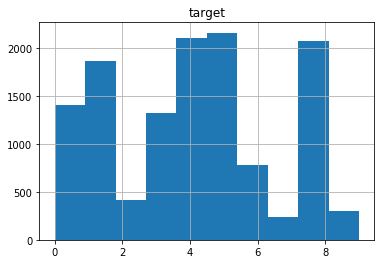

In [23]:
%matplotlib inline
train_smpl.hist(column='target')

In [24]:
train_smpl.target.value_counts()

5    2160
4    2100
8    2070
1    1860
0    1410
3    1320
6     780
2     420
9     300
7     240
Name: target, dtype: int64

#### imbalanced classes => won't generalize

# 2. Data Randomisation

## sklear.utils.suffle

In [25]:
train_smpl = shuffle(train_smpl, random_state=42)
train_smpl_0 = shuffle(train_smpl_0, random_state=42)
train_smpl_1 = shuffle(train_smpl_1, random_state=42)
train_smpl_2 = shuffle(train_smpl_2, random_state=42)
train_smpl_3 = shuffle(train_smpl_3, random_state=42)
train_smpl_4 = shuffle(train_smpl_4, random_state=42)
train_smpl_5 = shuffle(train_smpl_5, random_state=42)
train_smpl_6 = shuffle(train_smpl_6, random_state=42)
train_smpl_7 = shuffle(train_smpl_7, random_state=42)
train_smpl_8 = shuffle(train_smpl_8, random_state=42)
train_smpl_9 = shuffle(train_smpl_9, random_state=42)
train_smpl.head()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,target
1236,25.0,24.0,28.0,27.0,24.0,22.0,22.0,22.0,21.0,21.0,...,34.0,33.0,34.0,36.0,35.0,35.0,34.0,34.0,35.0,0
8847,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,241.0,230.0,237.0,227.0,241.0,241.0,239.0,241.0,237.0,5
11285,34.0,34.0,34.0,33.0,32.0,31.0,31.0,30.0,30.0,30.0,...,16.0,14.0,12.0,11.0,11.0,11.0,13.0,17.0,19.0,8
12423,63.0,66.0,70.0,81.0,77.0,72.0,62.0,61.0,60.0,62.0,...,123.0,77.0,47.0,44.0,43.0,42.0,55.0,71.0,68.0,9
10020,38.0,39.0,40.0,50.0,61.0,72.0,93.0,138.0,185.0,233.0,...,62.0,68.0,68.0,81.0,98.0,86.0,73.0,68.0,65.0,6


In [26]:
train_smpl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12660 entries, 1236 to 7270
Columns: 2305 entries, 0 to target
dtypes: float64(2304), int64(1)
memory usage: 222.7 MB


In [27]:
train_smpl.describe()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,target
count,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,...,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000,12660.000000
mean,90.275908,90.296840,90.331043,90.369510,90.608847,90.852370,91.113033,91.427488,91.566588,91.775355,...,71.547393,71.399368,70.980253,70.064455,69.243681,68.339336,67.716983,67.734992,67.784123,4.066351
std,79.531811,79.674242,79.816240,79.896452,79.958141,80.082173,80.266651,80.406439,80.439131,80.457116,...,65.317373,65.485237,65.649521,65.109495,64.328815,63.312147,62.688005,62.951496,63.289188,2.670880
min,5.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,6.000000,...,6.000000,6.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,5.000000,0.000000
25%,29.000000,29.000000,29.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,29.000000,...,25.000000,25.000000,25.000000,25.000000,24.000000,24.000000,24.000000,24.000000,24.000000,1.000000
50%,55.000000,56.000000,55.000000,55.000000,56.000000,56.000000,56.000000,56.000000,57.000000,57.000000,...,47.000000,47.000000,46.000000,45.000000,44.000000,44.000000,44.000000,43.000000,43.000000,4.000000
75%,136.000000,136.000000,135.000000,136.000000,137.000000,137.000000,140.000000,140.000000,140.000000,140.000000,...,93.000000,93.000000,92.000000,91.000000,90.000000,88.000000,87.000000,86.000000,87.000000,6.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,9.000000


# 3. Reducing the size

#### Because the data runs the data as a Python file, we do not need to reduce the size of our data set. 



# 4 - 6: NB, Features/Attributes Selection, & Improving #5's Classification  

## correlation matrix

In [17]:
%matplotlib inline

#plt.matshow(train_smpl.corr())
#plt.show()

# Test Train Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_smpl[train_smpl.columns[:2303]], train_smpl['target'], test_size=0.33, random_state=42)

X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(train_smpl_20[train_smpl_20.columns[:20]], train_smpl_20['target'], test_size=0.33, random_state=42)
X_train_50, X_test_50, y_train_50, y_test_50 = train_test_split(train_smpl_50[train_smpl_50.columns[:50]], train_smpl_50['target'], test_size=0.33, random_state=42)
X_train_100, X_test_100, y_train_100, y_test_100 = train_test_split(train_smpl_100[train_smpl_100.columns[:100]], train_smpl_100['target'], test_size=0.33, random_state=42)

# Modeling

## Multinomial Naive Bayes model (multi-class classifier)

### Before Features/Attributes Selection

In [ ]:
# In regards to problem 4: Because we are not using Weka, we did not need to apply any
# filters to the data before running Naive Bayes

In [ ]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

In [ ]:
y_pred = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
        https://stackoverflow.com/a/50386871
    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
plot_confusion_matrix(conf_mat, target_names=y_test.unique())

In [ ]:
# looking for devious class labels that take high numbers of misclassifications
for i in range(conf_mat.shape[1]):
    column = conf_mat.T[i]
    misclassifications = column.sum() - column[i]
    print(misclassifications)

### 4. Naive Bayes on Multilabel dataset

In [ ]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
print(f"Multinomial NB: {clf.score(X_test, y_test)} ")

## 5. For each of the 10 train_smpl_label files, record the first 10 fields, in order of the absolute correlation value for each street sign.

In [ ]:
fileList = [train_smpl_0, train_smpl_1, train_smpl_2, train_smpl_3, train_smpl_4,
            train_smpl_5, train_smpl_6, train_smpl_7, train_smpl_8, train_smpl_9]
for f, file in enumerate(fileList):
    corrArr = []
    for j in file.columns[:-1]:
        corrVal, pVal = stats.pearsonr(file.iloc[:, int(j)], file.iloc[:, -1])
        # Record the absolute value of the correlation
        corrArr.append(math.fabs(corrVal))
    print(f"File {f}:")
    print(sorted([(x, i) for (i, x) in enumerate(corrArr)], reverse=True)[:10])

## 6. Naive Bayes using select features (20, 50, 100)

### Methods to run NB:

In [ ]:
def run_bernoulli_nb(data, num_feat, class_num):
    X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data[data.columns[:2303]], data['target'],
                                                                test_size=0.33, random_state=42)

    clf = BernoulliNB()
    clf.fit(X_train_2, y_train_2)
    print(f"Bernoulli NB Best {num_feat}0 Class {class_num}: {clf.score(X_test_2, y_test_2)}")

def run_multi_nb_binary(data, num_feat, class_num):
    X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data[data.columns[:2303]], data['target'],
                                                                test_size=0.33, random_state=42)
    clf = MultinomialNB()
    clf.fit(X_train_2, y_train_2)
    print(f"Multinomial for Binary NB Best {num_feat}0: Class {class_num}: {clf.score(X_test_2, y_test_2)}")

def run_multi_nb(data, num_feat):
    X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(data[data.columns[:2303]], data['target'],
                                                                test_size=0.33, random_state=42)
    clf = MultinomialNB()
    clf.fit(X_train_2, y_train_2)
    print(f"Multinomial NB Best {num_feat}0: {clf.score(X_test_2, y_test_2)}")

### 6. Select top 2, 5, and 10 features for all train_smpl_label files to create best 20, 50, and 100 sets for all 10 classes

In [ ]:
bestSet = [2, 5, 10]

for i, num in enumerate(bestSet):
    k_best_list = pd.DataFrame()
    # Get top k for each 10 classes
    for f, file in enumerate(fileList):
        k_best = SelectKBest(chi2, k=num).fit_transform(file[file.columns[:2303]], file['target'])
        k_best = pd.DataFrame(k_best)
        k_best_list = pd.concat([k_best_list, k_best], axis=1)
        # print(k_best_list.head())

    print(f"\nBinary NB Classifier {num}0:\n __________________________________")
    # run binary NB classifiers for each class
    for f, file in enumerate(fileList):
        k_best_binary = pd.concat([k_best_list, file['target'].reset_index()], axis=1)
        # print(f"K BEST BINARY: {k_best_binary}")
        run_multi_nb_binary(k_best_binary, num, f)

    print(f"\nMultilabel NB Classifier {num}0:\n __________________________________")
    k_best_multi = pd.concat([k_best_list, train_smpl['target'].reset_index()], axis=1)
    # print(f"K BEST MULTI: {k_best_multi}")
    run_multi_nb(k_best_multi, num)

# Analysis for 4 & 7

### 4. Explain the reason for choosing and using these filters. Once you can run the algorithm, record, compare and analyse the classifier’s accuracy on different classes (as given by the Weka Summary and the confusion matrix).

#### Since we are not using Weka, we did not need to apply any filters to the data before running Naive Bayes.

### 7. What kind of information about this data set did you learn, as a result of the above experiments? You should ask questions such as: Which streets signs are harder to recognise? Which street signs are most easily confused? Which attributes (fields) are more reliable and which are less reliable in classification of street signs? What was the purpose of Tasks 5 and 6? What would happen if the data sets you used in Tasks 4, 5 and 6 were not randomised? What would happen if there is cross-correlation between the non-class attributes? You will get more marks for more interesting and ``out of the box” questions and answers. Explain your conclusions logically and formally, using the material from the lecture notes and from your own reading to interpret the results that Weka produces.

#### Analysis....

## Conclusions from initial experiments (q7)

Using the multilabel confusion matrix, it is apparent that the multinomial Naïve Bayes classifier struggled with some classes, predicting them incorrectly most of the time. 

In particular, class 8 was more often classified as class 1 (probability 0.278), class 7 (probability 0.2023) and class 6 (probability 0.1974) before itself (probability 0.1283).

//It looks like the classifier was confused by ...



The strongest misclassification in the matrix is true members of class 3 being classified as class 7 (probability 0.2023). However, there is relatively very little of the reverse misclassification (true class 7 predicted as class 3).

//^^ investigate this?



Class 7 punches above its weight as the most abundant misclassification which is perhaps due to the relative infrequency of data for class 7. There must be some other factor, as there are less populated classes.

